# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Reading train.csv and Train & Test folder

In [2]:
train = pd.read_csv('../input/predict-volcanic-eruptions-ingv-oe/train.csv')

train_dir = "../input/predict-volcanic-eruptions-ingv-oe/train/"
test_dir =  "../input/predict-volcanic-eruptions-ingv-oe/test/"

In [3]:
"""Converting time_to_eruption to hours, minutes & seconds"""

train['h:m:s'] = (train['time_to_eruption']
                  .apply(lambda x:datetime.timedelta(seconds = x/100)))
train.head()

,segment_id,time_to_eruption,h:m:s
0,1136037770,12262005,1 days 10:03:40.050000
1,1969647810,32739612,3 days 18:56:36.120000
2,1895879680,14965999,1 days 17:34:19.990000
3,2068207140,26469720,3 days 01:31:37.200000
4,192955606,31072429,3 days 14:18:44.290000


> [](http://)**Sample train dataset**

In [4]:
sample = pd.read_csv('../input/predict-volcanic-eruptions-ingv-oe/train/1000015382.csv')
sample.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,260.0,64.0,-232.0,-36.0,-2.0,-35.0,103.0,389.0,67.0,41.0
1,233.0,175.0,146.0,160.0,-4.0,29.0,-120.0,498.0,59.0,63.0
2,216.0,236.0,321.0,202.0,2.0,113.0,-230.0,554.0,97.0,90.0
3,156.0,205.0,382.0,6.0,12.0,70.0,-228.0,580.0,141.0,122.0
4,158.0,101.0,272.0,-154.0,16.0,45.0,-162.0,624.0,145.0,154.0


In [5]:
sample.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
count,60001.000000,59847.000000,60001.000000,60001.000000,60001.000000,60001.000000,60001.000000,60001.000000,60001.000000,60001.000000
mean,0.382244,2.266563,2.192213,-0.148031,-0.263129,1.630089,-0.615190,-0.177964,-0.402777,0.896752
std,111.553322,451.741111,373.923764,231.812464,129.504432,222.294642,269.678045,319.999406,176.087814,249.024286
min,-920.000000,-7871.000000,-2444.000000,-1815.000000,-2484.000000,-1128.000000,-1453.000000,-2947.000000,-1585.000000,-2961.000000
25%,-66.000000,-163.000000,-223.000000,-150.000000,-30.000000,-147.000000,-172.000000,-194.000000,-106.000000,-117.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,67.000000,168.000000,224.000000,149.000000,30.000000,149.000000,174.000000,195.000000,106.000000,119.000000
max,822.000000,7321.000000,2563.000000,1491.000000,2608.000000,1119.000000,1668.000000,3676.000000,1162.000000,3179.000000


Plotting sample data

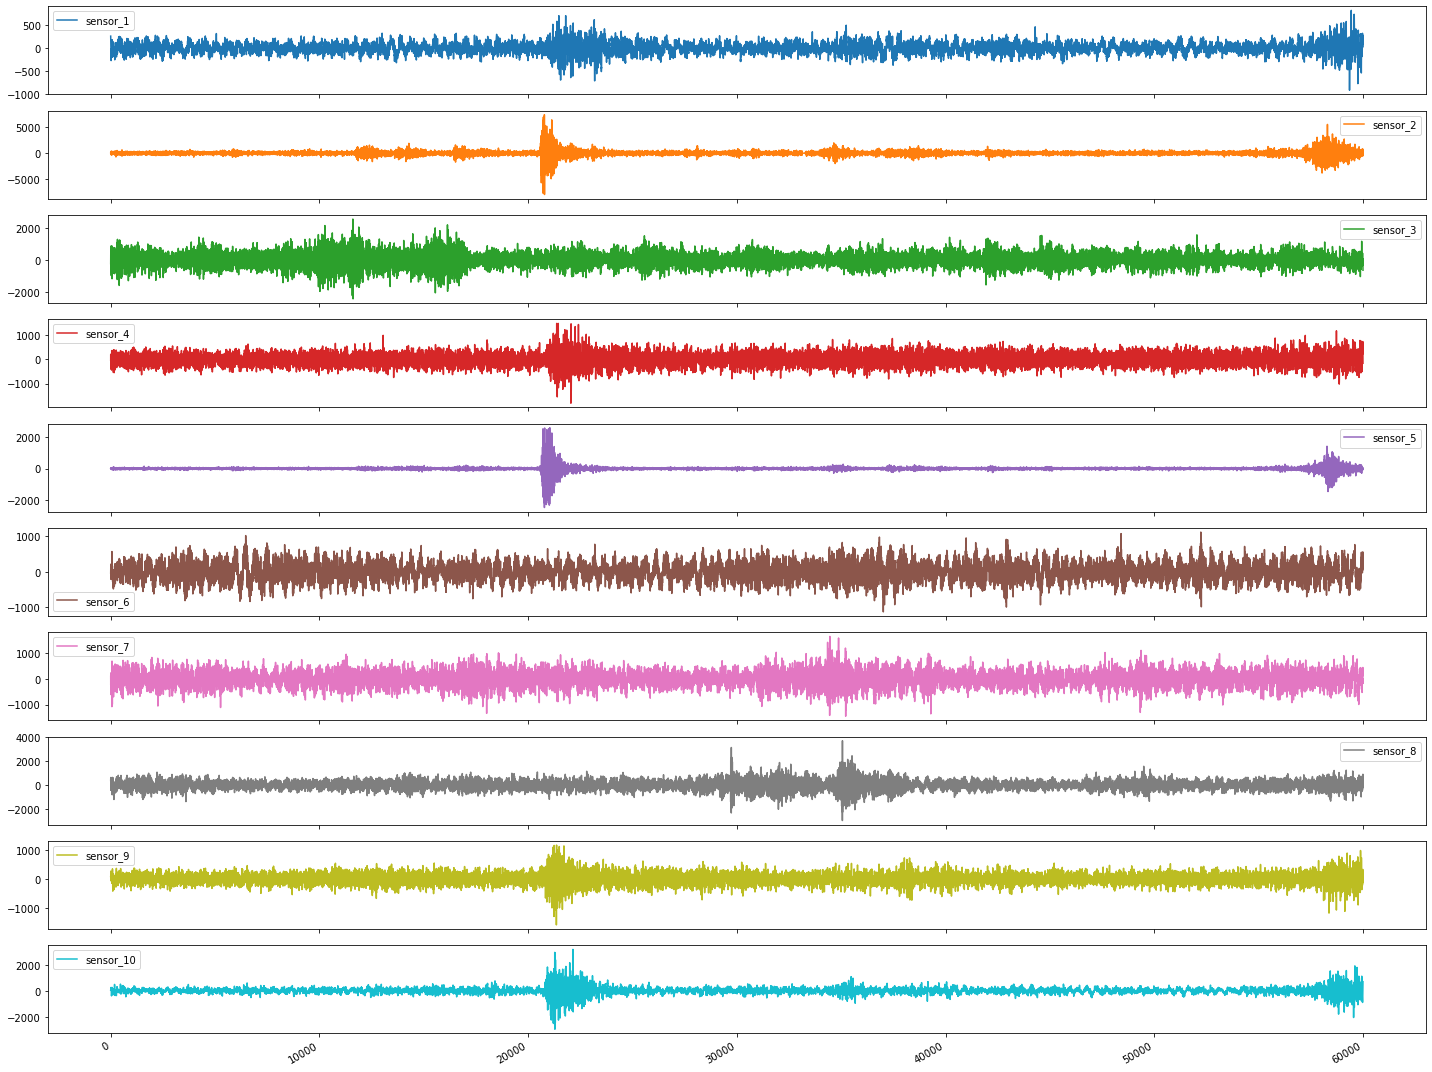

In [6]:
sample.fillna(0).plot(subplots = True, figsize = (20,15))
plt.tight_layout()
plt.show()

 **Data for Training Set**

In [7]:
'''Function to get training data'''
def get_csv(index):
    
    train_data = pd.read_csv(train_dir + str(train.segment_id.iloc[index]) + ".csv")
    train_data['time_to_eruption'] = train.time_to_eruption.iloc[index]
    
    for feat in train_data.drop('time_to_eruption',1).columns:
        train_data[feat] = train_data[feat].mean()
    
    train_data = train_data.sample()
    
    return(train_data)

In [8]:
data = pd.DataFrame()

for index in range(train.shape[0]):
    data = pd.concat([get_csv(index), data])
    

In [9]:
data.shape

(4431, 11)

In [10]:
data.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,time_to_eruption
12537,-4.142848,0.138031,1.955217,0.241129,-1.577340,0.385694,1.526325,0.802537,-1.700145,-45.584790,20128938
49301,0.905818,NaN,-0.648256,-2.339661,0.320345,6.707488,-3.654656,NaN,1.104332,-6.360564,9598270
58387,1.420993,0.446893,-1.197830,1.510475,-0.514108,-1.531391,1.858136,1.647323,-1.149198,-1.550374,31206935
17412,7.936884,NaN,5.014233,-4.597357,NaN,0.607590,1.506825,-4.511225,5.498189,10.939634,35659379
54192,0.906735,-3.658256,-0.751437,1.915551,-1.734333,-22.033699,1.607623,0.046333,-1.802253,-3.377394,15695097


In [11]:
for i in data:
    data[i] = data[i].replace(np.nan, data[i].mean())

data.isnull().sum()

sensor_1            0
sensor_2            0
sensor_3            0
sensor_4            0
sensor_5            0
sensor_6            0
sensor_7            0
sensor_8            0
sensor_9            0
sensor_10           0
time_to_eruption    0
dtype: int64

**Data for Test Set**

In [12]:
test = pd.read_csv("../input/predict-volcanic-eruptions-ingv-oe/sample_submission.csv")

'''Function to get test data'''
def get_csv_test(index):
    
    test_data = pd.read_csv(test_dir + str(test.segment_id.iloc[index]) + ".csv")
    
    for feat in test_data.columns:
        test_data[feat] = test_data[feat].mean()
    
    test_data = test_data.sample()
    
    return(test_data)

In [13]:
data_test = pd.DataFrame()

for index in range(test.shape[0]):
    data_test = pd.concat([get_csv_test(index), data_test])

In [14]:
data_test.shape

(4520, 10)

In [15]:
for i in data_test:
    data_test[i] = data_test[i].replace(np.nan, data_test[i].mean())
data_test.isnull().sum()

sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
dtype: int64

In [16]:
x_train = data.drop('time_to_eruption', axis = 1)
y_train = data.time_to_eruption
x_test = data_test.copy()

# Dimensionality Reduction

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 5)
x_train = lda.fit_transform(x_train, y_train) 
x_test = lda.transform(x_test)

# **XGBoost**

In [18]:
import xgboost as xgb
from xgboost import XGBRegressor

model = XGBRegressor(max_depth = 10, n_estimators = 20, learning_rate = 0.3)
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Importance Graph

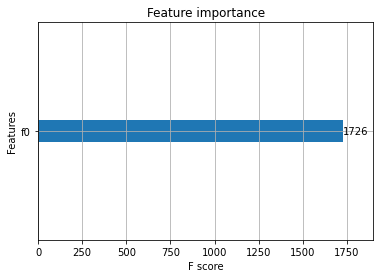

In [19]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

Predictions

In [20]:
pred = model.predict(x_test)
pred

array([29638012., 27932254., 24108252., ..., 26502770., 23464280.,
       24108252.], dtype=float32)

In [21]:
test['time_to_eruption'] = pred
sub = test[['segment_id', 'time_to_eruption']]

In [22]:
sub.head()

,segment_id,time_to_eruption
0,1000213997,29638012.0
1,100023368,27932254.0
2,1000488999,24108252.0
3,1001028887,26584642.0
4,1001857862,13754232.0


In [23]:
sub.to_csv('submission.csv',index=False)